# Atividade Pr√°tica 6 

## An√°lise din√¢mica de sinais

#### Nome: Diogo Jos√© Costa Alves N¬∞ USP: 13709881

###  Sinais com conte√∫do espectral variante no tempo

Todos os sinais no mundo real possuem conte√∫do espectral que varia com o tempo: eventos come√ßam e terminam, componentes senoidais que estavam presentes num certo momento j√° n√£o est√£o presentes em outro, ou est√£o presentes com intensidade menor.

Em oposi√ß√£o a essa vis√£o *din√¢mica* do conte√∫do dos sinais, a an√°lise de Fourier em $\mathbb{C}^N$ parte de cole√ß√µes de formas b√°sicas de onda $\{E_k\}$ com frequ√™ncias fixas $k=0,\ldots,N-1$, que para cada sinal $x$ analisado s√£o associadas a coeficientes $X_k$ que s√£o *est√°ticos*, visto que multiplicam "globalmente" o sinal temporal $E_k$.

Uma maneira de tornar a an√°lise de Fourier mais "din√¢mica" consiste em analisar segmentos curtos de um sinal "longo" $x\in\mathbb{C}^N$, tomando-se $M\ll N$ amostras de cada vez. Essa abordagem segmentada j√° apareceu no cap√≠tulo 3 e na atividade pr√°tica 4, tanto em sinais unidimensionais quanto bidimensionais (onde os segmentos eram chamados de "blocos" no esquema de compress√£o JPEG).

Usando dois par√¢metros, $M>0$ (dura√ß√£o em amostras) e $m>0$ (amostra inicial), podemos determinar um segmento do sinal $x$ como

$$\tilde{x} = \left(x_{m},x_{m+1},\ldots,x_{m+M-1}\right)\in\mathbb{C}^M,$$

e assim considerar sua DFT $\tilde{X}\in\mathbb{C}^M$ para efeito de caracteriza√ß√£o do conte√∫do espectral de $x$ no recorte $[m,m+M)$.

Lembre-se que o n√∫mero de amostras $M$ determina tanto a dura√ß√£o do sinal (de $\Delta_t=\frac{M}{R}$ segundos se $R$ √© a taxa de amostragem) quanto a resolu√ß√£o em frequ√™ncia (pois os bins da DFT s√£o separados por $\Delta_f=\frac{R}{M}$ Hz).

Assim, numa an√°lise segmentada, deseja-se usar segmentos de dura√ß√£o $\Delta_t$ razoavelmente curta para evitar que o car√°ter "est√°tico" das formas b√°sicas de onda de Fourier seja um empecilho, e suficientemente longos a fim de garantir uma resolu√ß√£o em frequ√™ncia $\Delta_f$ adequada.

Esses dois crit√©rios antag√¥nicos est√£o na origem de uma quest√£o crucial em an√°lise de sinais que √© frequentemente chamada de *Princ√≠pio da Incerteza*, por uma alus√£o metaf√≥rica ao princ√≠pio de Heisenberg em F√≠sica Qu√¢ntica: n√£o √© poss√≠vel localizar de forma perfeita uma componente do sinal simultaneamente nos dom√≠nios temporal e espectral:

- quanto melhor a localiza√ß√£o temporal (menor $M$), maior a imprecis√£o espectral ($R/M$), e 

- quanto melhor a precis√£o espectral (menor $R/M$), pior a localiza√ß√£o temporal (maisr $M$).

Em outros termos, a precis√£o temporal $\Delta_t=\frac{M}{R}$ e a resolu√ß√£o espectral $\Delta_f=\frac{R}{M}$ satisfazem a condi√ß√£o invariante $\Delta_t\Delta_f=1$.

### Exemplo: varredura senoidal

Na c√©lula abaixo est√° constru√≠do um sinal, amostrado a $R=44100$ Hz, com uma varredura senoidal definida pela express√£o

$$x(t) = \sin(2\pi f(t)t),\quad t\in[0,D)$$

onde $D=10$ segundos e $f(t)$ √© uma fun√ß√£o linear que vai de $0$ at√© $1000$ no intervalo $t\in[0,D)$. O espectro de magnitude desse sinal aparece em seguida, evidenciando o problema da falta de localiza√ß√£o da DFT: v√°rias frequ√™ncias comp√µem o sinal, mas n√£o se sabe em que trecho do sinal elas aparecem ou desaparecem.

In [1]:
# importa depend√™ncias
import math as m
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft
from IPython.display import Audio
from ipywidgets import IntSlider, interactive, VBox, HBox

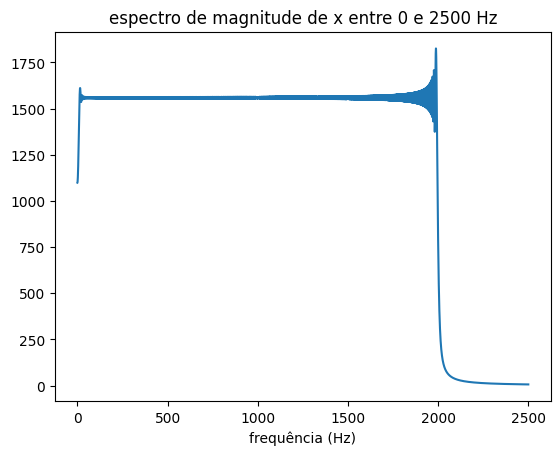

In [2]:
R = 44100 # taxa de amostragem em Hz
D = 10 # dura√ß√£o em segundos
t = np.arange(0,D,1/R) # linha do tempo de 0 a D segundos

f = t*100 # fun√ß√£o f(t)

x = np.sin(2*m.pi*f*t) # sinal x(t)

X = fft(x) # espectro de x

k0 = int(len(X)*2500/R) # √≠ndice correspondente a 2500 Hz

plt.plot(np.arange(k0)*R/len(X),abs(X[0:k0]))

plt.xlabel("frequ√™ncia (Hz)")
plt.title(r"espectro de magnitude de x entre 0 e 2500 Hz")

Audio(x.T, rate=R) # elemento interativo para ouvir a varredura senoidal

**Exerc√≠cio 1 (cont.):**

Adapte o c√≥digo fornecido do exemplo interativo abaixo para representar o **espectro de magnitude**, sempre no intervalo de frequ√™ncias de $0$ Hz a $2500$ Hz, do segmento do sinal $x$ definido pelos par√¢metros interativos $m\in\{0,1000,2000,\ldots\}$ e $M\in\{100,200,300,\ldots,10000\}$. Experimente a interface com alguns valores de $m$ e $M$, e em seguida responda de forma sucinta as perguntas contidas na caixa de texto ap√≥s o c√≥digo.

**Dica:** *Cuidado com o √∫ltimo segmento, para garantir que $m+M-1$ ainda √© um √≠ndice v√°lido. Um exemplo de espectro no formato esperado √© <img src="http://www.ime.usp.br/~mqz/dsp/espectro.png" alt="espectro" width="400"/>*

In [3]:
# Resposta do exerc√≠cio 1

def exercicio1():
    # plota o gr√°fico x(t) no intervalo [a,a+b] (√≠ndices de amostras)
    def iplot(a,b):
        if a+b-1 > len(x): return # apenas para n√£o quebrar
        
        x_til = x[a:a+b]
        X_til = fft(x_til)
        
        k0 = int(len(X_til)*2500/R) # √≠ndice correspondente a 2500 Hz

        plt.plot(np.arange(k0)*R/len(X_til),abs(X_til[0:k0]))
        
        
        
        t_inicial = a*D/len(x)
        t_final = (a+b)*D/len(x)
        plt.xlabel("frequ√™ncia (Hz)")
        #plt.title(r"espectro de x em $t \in $ [{:.2f},{:.2f}], len(X_til)={}".format(t_inicial,t_final, len(X_til)))
        plt.title(r"espectro de x em $t \in $ [{:.2f},{:.2f}], max(abs(X_til))={:.2f}".format(t_inicial,t_final, max(abs(X_til))))
        plt.show()

    #ultimo_a = 441000 - b -1
    a = IntSlider(min=0, max=len(x), step=1000, value=111132, continuous_update=False, description=r'$m$')
    b = IntSlider(min=100, max=10000, step=100, value=900, continuous_update=False, description=r'$M$')
    w = interactive(iplot, a=a, b=b)
    display(HBox([w.children[2],VBox([w.children[0],w.children[1]])]))
    w.update()

exercicio1()

#### Resposta do exerc√≠cio 1 (cont)

#### 1. qual √© o perfil t√≠pico de cada espectro?
R: O perfil t√≠pico de cada espectro √© o de um √∫nico pico de frequ√™ncia. A resolu√ß√£o do espectro √© relacionada √† largura do recorte(M).


#### 2. qual √© o comportamento aparente em fun√ß√£o de $m$ para um $M$ fixado (tome por exemplo $M$=1000), e em particular quais s√£o as frequ√™ncias m√≠nima e m√°xima dos picos espectrais observados?
R: O comportamento aparente em uma varredura do $m$, fixando o $M=1000$, √© de uma varia√ß√£o crescente do pico de frequ√™ncia detectado.
A magnitude do sinal come√ßa √© em 106,73 quando m=0, 796,73 quando m=2, e depois a magnitude fica mais ou menos est√°vel entre (300,500).

Aparentemente o pico de frequ√™ncia varia de m√≠nimo de Hz quando m=0, at√© um m√°ximo pr√≥ximo de 2000Hz nos √∫ltimos valores de m.


### 3. qual √© o comportamento aparente em fun√ß√£o de $M$ para um $m$ fixado (tome por exemplo $m$=200000)?
R: O comportamento aparente para uma varredura do $M$, fixando o $m=200000$ √© uma varia√ß√£o crescente na resolu√ß√£o do espectro de frequ√™ncia.

A magnitude do pico de frequ√™ncia detectado varia de forma crescente, conforme a largura do segmento $M$.


Al√©m disso conforme a resolu√ß√£o do espectro de frequ√™ncia vai aumentando, aumentando o $M$, percebemos um aumento na defini√ß√£o/exatid√£o do pico detectado.



### Espectrogramas

Uma forma conveniente de organizar os espectros de todos os segmentos $M$-dimensionais de um mesmo sinal $x\in\mathbb{C}^N$ √© na forma de uma matriz $\mathcal{X}\in\mathcal{M}_{M\times L}(\mathbb{C})$, onde $L$ √© o n√∫mero de segmentos, e a coluna $m$ cont√©m a DFT de $\tilde{x} = \left(x_{m},x_{m+1},\ldots,x_{m+M-1}\right)\in\mathbb{C}^M$.

Em particular, a matriz $|\mathcal{X}|$ dos valores absolutos com as linhas dispostas ascendentemente de $0$ at√© $\frac{M}{2}$ (componente de Nyquist) √© chamada de *Espectrograma* de $x$. Nessa *imagem*, o tempo √© lido na horizontal, a frequ√™ncia na vertical, e os pixels $(k,m)$ de maior intensidade correspondem √†s componentes de frequ√™ncia $k$ ativas no segmento $m$ do sinal.

**Exerc√≠cio 2:** adapte o c√≥digo do gr√°fico interativo para construir um espectrograma do sinal $x$ em fun√ß√£o de um par√¢metro interativo $M\in\{100,200,300,\ldots,10000\}$, considerando as frequ√™ncias entre $0$ e $2500$ Hz. Considere que os segmentos s√£o justapostos, come√ßando nas amostras $m=0,M,2M,3M,\ldots$. Comente de forma sucinta na caixa de texto ap√≥s o c√≥digo suas observa√ß√µes em rela√ß√£o √† visualiza√ß√£o oferecida pelo espectrograma para a varia√ß√£o de frequ√™ncia instant√¢nea do sinal $x$, considerando distintos valores de $M$, e comparando suas observa√ß√µes com aquelas do exerc√≠cio 1.

**Dica:** *construa o espectrograma fazendo o append de linhas, e coloque o resultado no formato convencional usando <tt>np.rot90</tt>; al√©m disso, use a op√ß√£o <tt>aspect='auto'</tt> da fun√ß√£o <tt>plt.imshow</tt> para preservar um tamanho fixo do espectrograma para todos os valores de $M$. Um exemplo de espectrograma no formato esperado √© <img src="http://www.ime.usp.br/~mqz/dsp/espectrograma.png" alt="espectro" width="400"/>*

In [4]:
# Resposta do Exerc√≠cio 2

def exercicio2():
    # plota o gr√°fico x(t) no intervalo [a,a+b] (√≠ndices de amostras)
    def iplot(M):
        N = len(x)
        rows = []
        
        k0 = int(M*2500/R) # √≠ndice correspondente a 2500 Hz
        
        for m in range(0,N-M,M):
            x_til = x[m:m+M]
            X_til = fft(x_til)
            
            rows.append(abs(X_til[0:k0]))
            
        rows_rot90 = np.rot90(rows)
        plt.imshow(rows_rot90, aspect='auto', extent=[0, 10, 0, 2500])

        plt.xlabel("tempo em segundos")
        plt.ylabel("frequ√™ncia em Hz")
        plt.title(f'espectograma com M={M}')


    #ultimo_a = 441000 - b -1
    M = IntSlider(min=100, max=10000, step=100, value=1000, continuous_update=False, description=r'$M$')
    w = interactive(iplot, M=M)
    display(HBox([w.children[1],w.children[0]]))
    w.update()

exercicio2()

#### Resposta do exerc√≠cio 2 (cont)

Comente de forma sucinta na caixa de texto ap√≥s o c√≥digo suas observa√ß√µes em rela√ß√£o √† visualiza√ß√£o oferecida pelo espectrograma para a varia√ß√£o de frequ√™ncia instant√¢nea do sinal ùë•, considerando distintos valores de ùëÄ, e comparando suas observa√ß√µes com aquelas do exerc√≠cio 1.

**Coment√°rios e observa√ß√µes:**

R: A visualiza√ß√£o do espectograma √© uma forma mais conveniente para visualizar o sinal de frequ√™ncia. Permite n√£o apenas detectar a frequ√™ncia mas tamb√©m perceber em que momento ela estava ativa ou n√£o.

Assim como no exerc√≠cio 1, a varia√ß√£o do tamanho do segmento $M$ afeta a resolu√ß√£o do espectro de frequ√™ncia. 
Da mesma forma que no exerc√≠cio 1, quanto maior o segmento $M$ maior a resolu√ß√£o do espectro, podemos perceber o mesmo efeito no desenho do espectograma.



### Frequ√™ncia instant√¢nea

Afinal como se estima a frequ√™ncia instant√¢nea de um sinal senoidal de frequ√™ncia vari√°vel?

E porque a express√£o 

$$x(t) = \sin(2\pi f(t)t),\quad t\in[0,D)$$

com $f(t)$ indo de $0$ at√© $1000$ produz frequ√™ncias instant√¢neas de at√© $2000$ Hz?

Uma maneira de conceituar a frequ√™ncia instant√¢nea de um sinal senoidal √© consider√°-lo como proje√ß√£o de um movimento circular uniforme: por exemplo, a fun√ß√£o complexa $g(t)=e^{i2\pi ft}$ possui como proje√ß√£o horizontal (eixo real) a fun√ß√£o $g_1(t)=\Re[g(t)]=\cos(2\pi ft)$ e como proje√ß√£o vertical a fun√ß√£o $g_2(t)=\Im[g(t)]=\sin(2\pi ft)$.

Nas duas proje√ß√µes, a *velocidade de giro* √© de $\omega=2\pi f$ radianos/segundo, ou $f=\frac{\omega}{2\pi}$ Hz, que correspondem ao √¢ngulo ou fase (em radianos ou ciclos) percorrido num intervalo de 1 segundo. 

Em outras palavras, a frequ√™ncia (angular) instant√¢nea do sinal $x(t)$ corresponde √† varia√ß√£o de fase
$$\tilde{\omega} = \frac{\varphi_2-\varphi_1}{t_2-t_1} = \frac{2\pi f(t_2)t_2-2\pi f(t_1)t_1}{t_2-t_1}.$$
para dois instantes sucessivos $t_1$ e $t_2$ bem pr√≥ximos (no limite, estar√≠amos falando da *derivada* da fase instant√¢nea).

Num sinal digital amostrado a $R$ Hz, essa estimativa de frequ√™ncia instant√¢nea pode ser feita a cada amostra, considerando-se a express√£o acima para dois instantes amostrais sucessivos $t_1$ e $t_2 = t_1+\frac{1}{R}$.

A estimativa $\tilde{\omega}$ estar√° em radianos/segundo, mas pode ser convertida facilmente para Hz usando a express√£o $\tilde{f} = \frac{\tilde{\omega}}{2\pi}$.

**Exerc√≠cio 3:** Escreva um c√≥digo que calcule os valores da frequ√™ncia instant√¢nea em Hz $\tilde{f}(t)$ no intervalo $t\in[0,10)$, a partir da express√£o da $f(t)$ usada no exerc√≠cio 1, e plote em um mesmo gr√°fico as fun√ß√µes $f(t)$ e $\tilde{f}(t)$. Comente ap√≥s o c√≥digo: seu gr√°fico corrobora as observa√ß√µes dos exerc√≠cios 1 e 2?

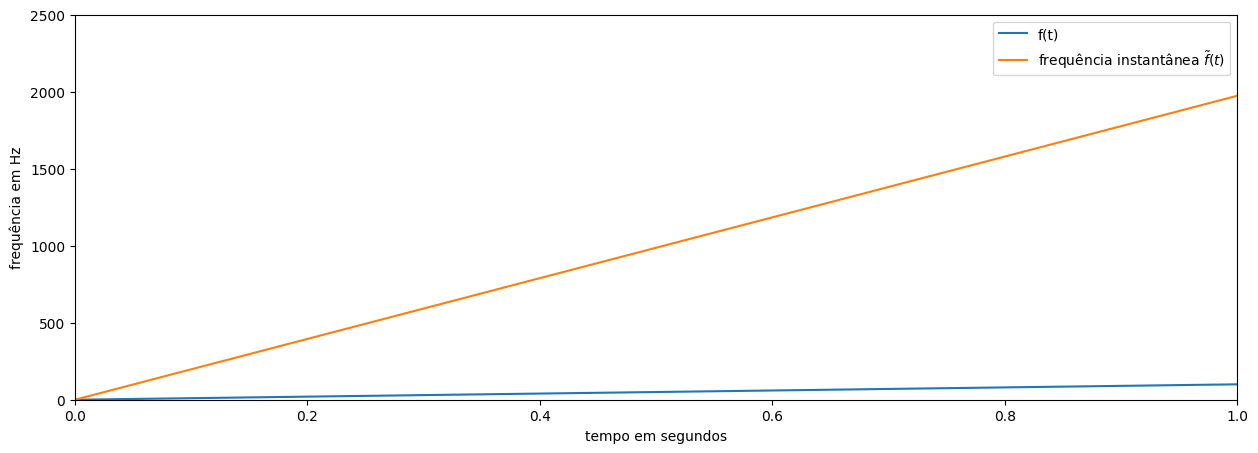

In [5]:
import math

def exercicio3(f):
    omegatil = np.zeros(len(f))

    for i in range(len(f)-1):
        t1 = t[i]
        t2 = t[i+1]
        ft1 = f[i]
        ft2 = f[i+1]
        omegatil[i] = ((2 * math.pi * ft2 * t2) - (2 * math.pi * ft1 * t1)) / (t2 - t1)

    # convertendo para Hz
    ftil = omegatil / 2*math.pi

    plt.figure(figsize=(15,5));
    plt.plot(t,f, label=r'f(t)')

    plt.plot(t,ftil, label=r"frequ√™ncia instant√¢nea $\tilde{f}(t)$");
    plt.xlabel('tempo em segundos')
    plt.ylabel('frequ√™ncia em Hz')
    plt.axis([0, 1, 0, 2500]);
    plt.legend()
    plt.show()

exercicio3(f)

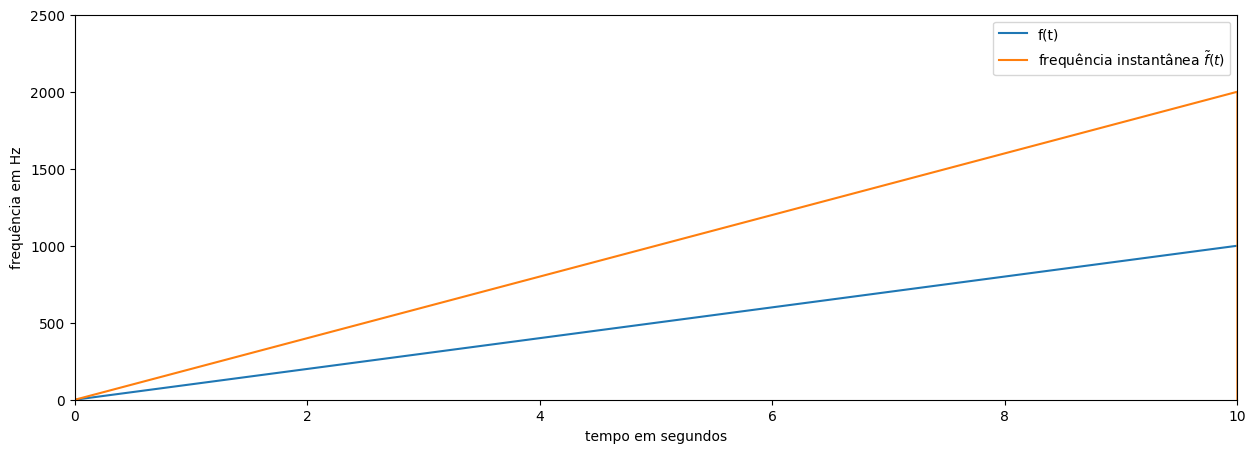

In [6]:
import math

def exercicio3_2(f):
    omegatil = np.zeros(len(f))

    for i in range(len(f)-1):
        t1 = t[i]
        t2 = t[i+1]
        ft1 = f[i]
        ft2 = f[i+1]
        omegatil[i] = ((2 * math.pi * ft2 * t2) - (2 * math.pi * ft1 * t1)) / (t2 - t1)

    # convertendo para Hz
    ftil = omegatil / (2*math.pi)

    plt.figure(figsize=(15,5));
    plt.plot(t,f, label=r'f(t)')

    plt.plot(t,ftil, label=r"frequ√™ncia instant√¢nea $\tilde{f}(t)$");
    plt.xlabel('tempo em segundos')
    plt.ylabel('frequ√™ncia em Hz')
    plt.axis([0, 10, 0, 2500]);
    plt.legend()
    plt.show()

exercicio3_2(f)

In [8]:
len(t)

441000

**Resposta do exerc√≠cio 3 (cont)**

**Comente:** Seu gr√°fico corrobora as observa√ß√µes dos exerc√≠cios 1 e 2?

Assim como no exerc√≠cio 1, percebemos a varia√ß√£o crescente no pico de frequ√™ncia detectado, quando fixamos $M$ e varremos $m$.

Assim como no exerc√≠cio 2, percebemos uma linha com inclina√ß√£o positiva no gr√°fico do espectograma.

A curva $\tilde{f}$ apresenta uma varia√ß√£o positiva na frequ√™ncia instant√¢nea.

Os intervalos de valores da curva $\tilde{f}$ √© visualmente compat√≠vel com o gr√°fico do espectograma e corrobora as observa√ß√µes dos exerc√≠cios 1 e 2.
